In [1]:
import sys
import numpy as np
from windy_gridworld import WindyGridworldEnv
from numpy.random import choice
import seaborn as sns
import matplotlib.pyplot as plt

import sys
import numpy as np
from windy_gridworld import WindyGridworldEnv
from numpy.random import choice
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation

import pandas as pd

pd.set_option('display.max_columns', 100)
pd.set_option('display.max_rows', 100)
pd.set_option('display.width', 2000)

/Applications/Anaconda/anaconda3/lib/python3.8/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.24.2
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [3]:
class Sarsa:
    def __init__(self, exploitation_rate=0.1, decay_factor=0.3, learning_rate=0.1, trace_decay=0.5):
        self.env = WindyGridworldEnv()
        self.nA = self.env.action_space.n
        self.nB = self.env.observation_space.n
        self.epsilon = exploitation_rate
        self.gamma = decay_factor
        self.alpha = learning_rate
        self.Q = np.zeros([70, self.nA])
        self.lbd = trace_decay
        self.E = np.zeros([70, self.nA])
        self.walks = []
        pass

    @staticmethod
    def get_direction(a):
        if a == 0:
            return 'up'
        elif a == 1:
            return 'right'
        elif a == 2:
            return 'down'
        elif a == 3:
            return 'left'
        else:
            sys.exit(250)
        pass

    def get_epision_greedy_action_policy(self, q, observation):
        A = np.ones(self.nA, dtype=float) * self.epsilon / self.nA
        best_action = np.argmax(q[observation])
        A[best_action] += (1.0 - self.epsilon)  # update non-optimum action probability for exploration
        a = np.random.choice(np.arange(self.nA), p=A)
        return a, self.get_direction(a)

    def sarsa_lambda(self, total_episodes):
        self.walks = []
        for k in range(total_episodes):
            cnt_steps = 0
            current_state = self.env.reset()
            current_action, comment = self.get_epision_greedy_action_policy(self.Q, current_state)
            while True:
                next_state, reward, done, _ = self.env.step(current_action)
                next_action, comment = self.get_epision_greedy_action_policy(self.Q, next_state)
                td_target = reward + self.gamma * self.Q[next_state][next_action]
                td_error = td_target - self.Q[current_state][current_action]
                # E(S,A) += 1
                self.E[current_state][current_action] += 1
                # update Q(S,A) with E(S,A) for all states
                for s in range(70):
                    self.Q[s][:] += self.alpha * td_error * self.E[s][:]
                    self.E[s][:] *= self.gamma * self.lbd
                cnt_steps += 1
                if done:
                    print('Round %5d : cost %5d steps' % (k, cnt_steps))
                    self.walks.append(cnt_steps)
                    break
                current_state = next_state
                current_action = next_action
        return self.Q

    def visualization(self):
        fig = plt.figure(figsize=(10, 4), dpi=100, constrained_layout=True)
        gs = plt.GridSpec(10, 4, figure=fig, left=0.1, right=0.9, bottom=0.1, top=0.9, wspace=0.05, hspace=0.05)
        ax1 = fig.add_subplot(gs[0:4, :])
        ax2 = fig.add_subplot(gs[4:, :1])
        plt.suptitle("", fontsize=12)

        ax1.plot(range(len(self.walks)), self.walks, ':')
        ax1.set_title('The steps of walks')
        ax1.set_xlabel('episodic of walk')
        ax1.set_ylabel('steps of walk')
        ax1.set_yscale('log')
        ax1.grid(True)

        gridworld = np.zeros([7, 10])
        for x in range(7):
            for y in range(10):
                state = x * 10 + y
                mm = np.argmax(self.Q[state])
                gridworld[x][y] = mm
        pic = sns.heatmap(gridworld, annot=True, ax=ax2, vmin=0, vmax=3)
        #         plt.imshow(gridworld, cmap='hot', interpolation='nearest')
        plt.show()
        pass

    def show_Q(self):
        return pd.DataFrame(self.Q).T

Round     0 : cost  2857 steps
Round     1 : cost   343 steps
Round     2 : cost   178 steps
Round     3 : cost    33 steps
Round     4 : cost   313 steps
Round     5 : cost    60 steps
Round     6 : cost    46 steps
Round     7 : cost    39 steps
Round     8 : cost    91 steps
Round     9 : cost    17 steps
Round    10 : cost    33 steps
Round    11 : cost    59 steps
Round    12 : cost    38 steps
Round    13 : cost    25 steps
Round    14 : cost    72 steps
Round    15 : cost    50 steps
Round    16 : cost    67 steps
Round    17 : cost    28 steps
Round    18 : cost    21 steps
Round    19 : cost    42 steps
Round    20 : cost    29 steps
Round    21 : cost    53 steps
Round    22 : cost    16 steps
Round    23 : cost    27 steps
Round    24 : cost    21 steps
Round    25 : cost    32 steps
Round    26 : cost    18 steps
Round    27 : cost    43 steps
Round    28 : cost    31 steps
Round    29 : cost    37 steps
Round    30 : cost    32 steps
Round    31 : cost    56 steps
Round   

Round   287 : cost    21 steps
Round   288 : cost    17 steps
Round   289 : cost    17 steps
Round   290 : cost    17 steps
Round   291 : cost    18 steps
Round   292 : cost    26 steps
Round   293 : cost    19 steps
Round   294 : cost    17 steps
Round   295 : cost    20 steps
Round   296 : cost    16 steps
Round   297 : cost    16 steps
Round   298 : cost    24 steps
Round   299 : cost    20 steps
Round   300 : cost    20 steps
Round   301 : cost    17 steps
Round   302 : cost    17 steps
Round   303 : cost    18 steps
Round   304 : cost    18 steps
Round   305 : cost    45 steps
Round   306 : cost    19 steps
Round   307 : cost    16 steps
Round   308 : cost    16 steps
Round   309 : cost    20 steps
Round   310 : cost    16 steps
Round   311 : cost    17 steps
Round   312 : cost    26 steps
Round   313 : cost    16 steps
Round   314 : cost    20 steps
Round   315 : cost    19 steps
Round   316 : cost    16 steps
Round   317 : cost    16 steps
Round   318 : cost    23 steps
Round   

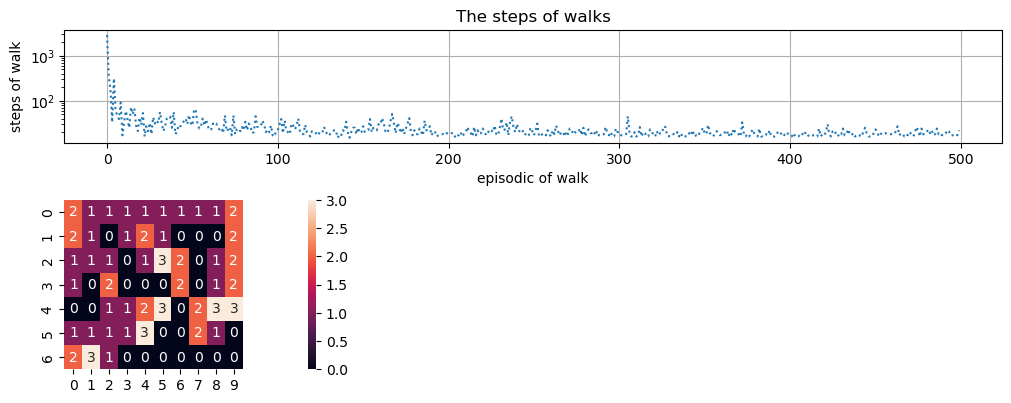

In [60]:
foo = Sarsa(exploitation_rate=0.1, decay_factor=0.9, learning_rate=0.1, trace_decay=0.9)
r = foo.sarsa_lambda(500)
foo.visualization()

Round     0 : cost   676 steps
Round     1 : cost    36 steps
Round     2 : cost    25 steps
Round     3 : cost   149 steps
Round     4 : cost    30 steps
Round     5 : cost    18 steps
Round     6 : cost    22 steps
Round     7 : cost    46 steps
Round     8 : cost    46 steps
Round     9 : cost    23 steps
Round    10 : cost    27 steps
Round    11 : cost    19 steps
Round    12 : cost    22 steps
Round    13 : cost    18 steps
Round    14 : cost    33 steps
Round    15 : cost    19 steps
Round    16 : cost    21 steps
Round    17 : cost    22 steps
Round    18 : cost    24 steps
Round    19 : cost    20 steps
Round    20 : cost    22 steps
Round    21 : cost    18 steps
Round    22 : cost    18 steps
Round    23 : cost    18 steps
Round    24 : cost    18 steps
Round    25 : cost    20 steps
Round    26 : cost    24 steps
Round    27 : cost    19 steps
Round    28 : cost    19 steps
Round    29 : cost    19 steps
Round    30 : cost    19 steps
Round    31 : cost    19 steps
Round   

Round   273 : cost    30 steps
Round   274 : cost    36 steps
Round   275 : cost    31 steps
Round   276 : cost    20 steps
Round   277 : cost    18 steps
Round   278 : cost    19 steps
Round   279 : cost    17 steps
Round   280 : cost    17 steps
Round   281 : cost    17 steps
Round   282 : cost    17 steps
Round   283 : cost    17 steps
Round   284 : cost    18 steps
Round   285 : cost    24 steps
Round   286 : cost    65 steps
Round   287 : cost    25 steps
Round   288 : cost    24 steps
Round   289 : cost    17 steps
Round   290 : cost    17 steps
Round   291 : cost    17 steps
Round   292 : cost    17 steps
Round   293 : cost    17 steps
Round   294 : cost    17 steps
Round   295 : cost    17 steps
Round   296 : cost    17 steps
Round   297 : cost    17 steps
Round   298 : cost    24 steps
Round   299 : cost    20 steps
Round   300 : cost    17 steps
Round   301 : cost    17 steps
Round   302 : cost    17 steps
Round   303 : cost    17 steps
Round   304 : cost    24 steps
Round   

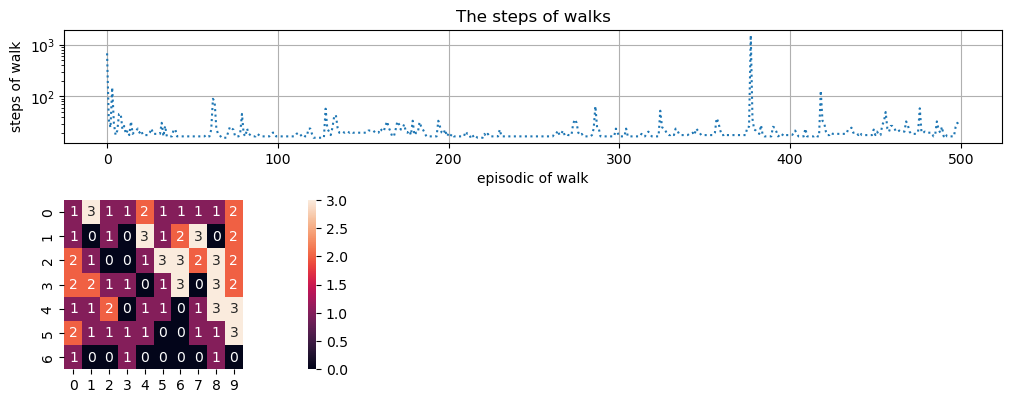

In [59]:
foo = Sarsa(exploitation_rate=0.02, decay_factor=0.9, learning_rate=0.9, trace_decay=0.9)
r = foo.sarsa_lambda(500)
foo.visualization()